##Project info

Project Topic: "Global Heart Attack Risk Prediction through Lifestyle and Health Data Analytics"


Short Description: This project aims to utilize the Heart Attack Risk Prediction Dataset to develop a predictive model that identifies individuals at high risk of a myocardial infarction based on a myriad of health indicators, lifestyle choices, and socioeconomic factors. The ultimate goal is to unearth key predictors, understand the intricate relationships between different risk factors, and propose actionable insights for early intervention and heart disease prevention strategies.


##Data info

kaggle link: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset?resource=download

Dataset Glossary (Column-wise)

* Patient ID (other) - Unique identifier for each patient
* Age (discrete) - Age of the patient
* Sex (binary cat) - Gender of the patient (Male/Female)
* Cholesterol (discrete) - Cholesterol levels of the patient
* Blood Pressure (other) - Blood pressure of the patient (systolic/diastolic)
* Heart Rate (nominal) - Heart rate of the patient
* Diabetes (binary cat) - Whether the patient has diabetes (Yes/No)
* Family History (binary cat) - Family history of heart-related problems (1: Yes, 0: No)
* Smoking (binary cat) - Smoking status of the patient (1: Smoker, 0: Non-smoker)
* Obesity (binary cat) - Obesity status of the patient (1: Obese, 0: Not obese)
* Alcohol Consumption (cat) - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
* Exercise Hours Per Week (numeric) - Number of exercise hours per week
* Diet (cat) - Dietary habits of the patient (Healthy/Average/Unhealthy)
* Previous Heart Problems (binary cat) - Previous heart problems of the patient (1: Yes, 0: No)
* Medication Use (binary cat) - Medication usage by the patient (1: Yes, 0: No)
* Stress Level (cat/nominal) - Stress level reported by the patient (1-10)
* Sedentary Hours Per Day (numeric) - Hours of sedentary activity per day
* Income (numeric) - Income level of the patient
* BMI (discrete) - Body Mass Index (BMI) of the patient
* Triglycerides (discrete) - Triglyceride levels of the patient
* Physical Activity Days Per Week (numeric) - Days of physical activity per week
* Sleep Hours Per Day (cat/nominal) - Hours of sleep per day
* Country (cat) - Country of the patient
* Continent (cat) - Continent where the patient resides
* Hemisphere (binary cat) - Hemisphere where the patient resides
* Heart Attack Risk (binary cat) - Presence of heart attack risk (1: Yes, 0: No)

##Data review

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
data.shape

(8763, 26)

In [ ]:
data.isnull().sum().sum()

0

##Filters

Let's begin by applying different filters to the dataset to extract specific information. We will analyze these subjects to gain insights related to heart attack risks.

In [ ]:
# Young Adults with High Cholesterol
young_high_cholesterol = data[(data['Age'] <= 35) & (data['Cholesterol'] > 200)]
young = data[(data['Age'] <= 35)]

print("Proportion of young adults (≤35 years) with high cholesterol among all young adults:", len(young_high_cholesterol)/len(young))
print("Proportion of young adults (≤35 years) with high cholesterol among all people:", len(young_high_cholesterol)/len(data))

Proportion of young adults (≤35 years) among all young adults: 0.716077026421854
Proportion of young adults (≤35 years) with high cholesterol among all people: 0.18247175624786033


This filter allows us to focus on young adults (≤35 years) with high cholesterol levels, a notable risk factor for heart disease. Despite their age, these individuals need attention due to their elevated cholesterol, which could predispose them to heart problems later in life. Notably, 71.6% of young adults in the dataset have high cholesterol, and they represent 18.2% of the total population under study. This indicates a significant health concern in this age group.



In [ ]:
# Elderly with High Blood Pressure
elderly_high_bp = data[(data['Age'] >= 65) & (data['Blood Pressure'].apply(lambda x: int(x.split('/')[0]) > 140))]
elderly = data[(data['Age'] >= 65)]

print("Proportion of elderly (≥65 years) with high systolic blood pressure among all elderly:", len(elderly_high_bp)/len(elderly))
print("Proportion of elderly (≥65 years) with high systolic blood pressure among all people:", len(elderly_high_bp)/len(data))

Proportion of elderly (≥65 years) with high systolic blood pressure among all elderly: 0.44642857142857145
Proportion of elderly (≥65 years) with high systolic blood pressure among all people: 0.1569097341093233


High systolic blood pressure is prevalent among the elderly (≥65 years), with 44.6% of elderly individuals in this category exhibiting high blood pressure. This group constitutes 15.7% of the entire dataset. Since high blood pressure is a common precursor to heart attacks, identifying and managing this condition in elderly individuals is crucial. This filter helps prioritize those who may need immediate medical intervention to mitigate heart attack risks.

In [ ]:
# Smokers with Family History of Heart Problems
smokers_family_history = data[(data['Smoking'] == 1) & (data['Family History'] == 1)]
smokers = data[(data['Smoking'] == 1)]

print("Proportion of smokers with family history of heart problems among all smokers:", len(smokers_family_history)/len(smokers))
print("Proportion of smokers with family history of heart problems among all people:", len(smokers_family_history)/len(data))

Proportion of smokers with family history of heart problems among all smokers: 0.49497391525639395
Proportion of smokers with family history of heart problems among all people: 0.44391190231655825


This subset combines two significant risk factors for heart disease: smoking and a family history of heart problems. Nearly half (49.5%) of smokers in the dataset have a family history of heart disease, and this group represents 44.4% of the total population. These individuals may require targeted awareness and prevention programs, as their combined risk factors significantly increase their likelihood of heart attacks.

In [ ]:
# Obese Individuals with Sedentary Lifestyle
obese_sedentary = data[(data['Obesity'] == 1) & (data['Sedentary Hours Per Day'] > 8)]
obese = data[(data['Obesity'] == 1)]

print("Proportion of obese individuals with sedentary lifestyle among all obese people:", len(obese_sedentary)/len(obese))
print("Proportion of obese individuals with sedentary lifestyle among all people:", len(obese_sedentary)/len(data))

Proportion of obese individuals with sedentary lifestyle among all obese people: 0.3320436959490214
Proportion of obese individuals with sedentary lifestyle among all people: 0.16649549241127468


Obesity paired with a sedentary lifestyle is a potent combination that heightens the risk of heart disease. About 33.2% of obese individuals in the dataset lead a sedentary lifestyle, and they account for 16.7% of the entire population. This emphasizes the need for lifestyle intervention programs aimed at reducing sedentary behavior and promoting physical activity among obese individuals to lower their heart disease risk.

In [ ]:
# High-income Individuals with Unhealthy Diets
high_income_unhealthy_diet = data[(data['Income'] > 200000) & (data['Diet'] == 'Unhealthy')]
high_income = data[(data['Income'] > 200000)]


print("Proportion of high-income individuals with unhealthy diets:", len(high_income_unhealthy_diet)/len(high_income))
print("Proportion of high-income individuals with unhealthy diets:", len(high_income_unhealthy_diet)/len(data))

Proportion of high-income individuals with unhealthy diets: 0.3297172912557528
Proportion of high-income individuals with unhealthy diets: 0.11445851877211001


Interestingly, unhealthy eating habits are prevalent even among high-income individuals. Approximately 32.9% of individuals earning over $200,000 have unhealthy diets, making up 11.5% of the total dataset. This finding underscores the need for dietary interventions across all economic segments, highlighting that wealth does not necessarily equate to healthier eating habits. Addressing this issue could help reduce heart disease risks in high-income groups.

##Sortings

Now let's move on to sorting the data, which will also reveal some insights (perhaps something will be useful for a future model)

In [ ]:
# Sort by Age in Descending Order
sorted_by_age = data.sort_values(by='Age', ascending=False)
sorted_by_age.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
5122,HMW6317,90,Male,214,128/67,103,1,1,1,1,...,3.576534,253533,24.005426,437,5,4,Japan,Asia,Northern Hemisphere,1
2313,TMJ8134,90,Male,180,121/103,86,0,0,1,0,...,8.950556,120698,34.417035,620,0,9,South Africa,Africa,Southern Hemisphere,0
3688,XRN3421,90,Male,229,124/110,92,1,0,1,1,...,7.598515,89461,32.922713,401,1,5,South Korea,Asia,Northern Hemisphere,1
7564,DJX9738,90,Male,368,176/85,57,0,1,1,0,...,0.558232,131918,38.032912,758,1,9,Nigeria,Africa,Northern Hemisphere,0
6931,ABR4955,90,Male,146,99/78,72,0,1,1,0,...,10.680788,224923,38.668300,474,4,6,Spain,Europe,Southern Hemisphere,0


Sorting the data by age in descending order allows us to observe the oldest patients in the dataset. This sorting reveals that the oldest patients, aged 90, have varying health metrics and come from different continents. Analyzing these patients could provide insights into longevity and its correlation with other health factors.

In [ ]:
# Sort by Cholesterol and Blood Pressure
sorted_by_cholesterol_bp = data.sort_values(by=['Cholesterol', 'Blood Pressure'], ascending=[False, False])
sorted_by_cholesterol_bp.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8540,ADF6733,69,Male,400,99/92,103,1,1,1,1,...,9.650413,188209,32.584632,156,4,9,Germany,Europe,Northern Hemisphere,0
1027,GEG2092,38,Male,400,97/78,41,1,0,1,1,...,3.390468,42790,31.778070,250,0,8,Japan,Asia,Northern Hemisphere,1
7165,AJN1863,85,Male,400,92/108,52,0,0,1,0,...,5.797627,239915,35.432924,478,6,10,India,Asia,Northern Hemisphere,0
4596,TJM4614,90,Male,400,179/83,79,1,1,1,0,...,0.157097,186999,31.352282,202,0,5,India,Asia,Northern Hemisphere,1
2365,KDZ8705,59,Female,400,175/84,81,1,1,1,0,...,9.155260,224163,33.139828,363,3,6,Italy,Europe,Southern Hemisphere,1


By sorting the data based on cholesterol and blood pressure in descending order, we can identify patients with the highest risk profiles for cardiovascular issues. These patients exhibit extremely high cholesterol levels, often accompanied by high blood pressure. This sorting helps in pinpointing individuals who may require immediate medical attention or targeted interventions.

In [ ]:
# Sort by Income and Heart Attack Risk
sorted_by_income_risk = data.sort_values(by=['Income', 'Heart Attack Risk'], ascending=[False, True])
sorted_by_income_risk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
1309,WQX6573,52,Male,190,95/81,89,1,0,1,0,...,10.336353,299954,35.178050,752,4,9,United Kingdom,Europe,Northern Hemisphere,1
2932,DBG3809,62,Female,294,178/82,46,0,0,1,0,...,3.158940,299909,29.349883,347,6,4,United Kingdom,Europe,Northern Hemisphere,1
8010,TZP7090,38,Female,397,172/89,88,0,0,0,0,...,3.831414,299891,37.112740,677,7,4,Brazil,South America,Southern Hemisphere,0
2783,JOG1127,90,Male,343,102/72,88,1,1,1,1,...,3.438909,299850,20.745345,443,3,9,France,Europe,Northern Hemisphere,1
8285,GAP1994,78,Male,357,102/61,83,1,0,1,1,...,6.970358,299810,26.532021,716,6,10,Nigeria,Africa,Northern Hemisphere,0


Sorting the data by income in descending order and heart attack risk in ascending order highlights patients who are financially well-off but may still be at risk for heart attacks. This sorting emphasizes the importance of not overlooking high-income individuals in preventive healthcare measures. It also suggests that income alone is not a protective factor against heart disease, and a holistic approach to health is crucial.

##Frequency Distributions for Categorical and Numeric Variables

Let's create frequency distributions for different variables.

In [ ]:
# Sex
sex_distribution = data['Sex'].value_counts()
print(sex_distribution)

Sex
Male      6111
Female    2652
Name: count, dtype: int64


The sex distribution shows a higher number of males (6111) compared to females (2652) in the dataset.

In [ ]:
# Diabets
diabetes_distribution = data['Diabetes'].value_counts()
print(diabetes_distribution)

Diabetes
1    5716
0    3047
Name: count, dtype: int64


The diabetes distribution reveals that a larger portion of the dataset consists of individuals with diabetes (5716) compared to those without diabetes (3047). This imbalance suggests a higher prevalence of diabetes in the studied population, which may be crucial for health-related analyses or interventions.

In [ ]:
# Continents
continent_distribution = data['Continent'].value_counts()
print(continent_distribution)

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64


The distribution across continents shows that the dataset is diverse, with the highest number of entries from Asia (2543) and Europe (2241). South America (1362), Australia (884), Africa (873), and North America (860) follow. This geographical spread can provide a comprehensive view of the variables studied across different regions, but also indicates a higher representation from certain continents which might influence the generalizability of the findings.

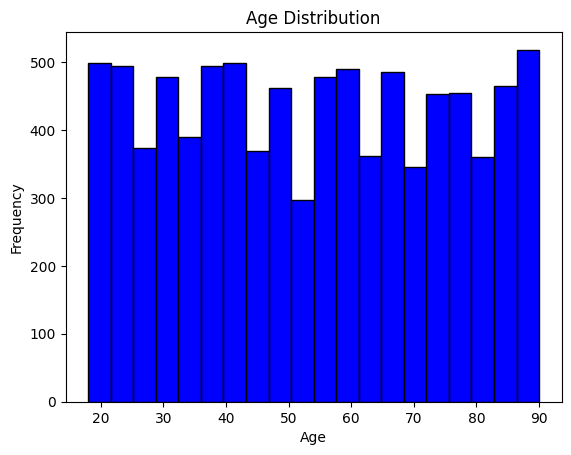

In [ ]:
# Age
plt.hist(data['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution is approximately uniform. However, there are strong jumps almost every 10-15 years. Surprisingly, the largest number of people studied are centenarians (90 years old), the least aged people in the range of 50-55 years.

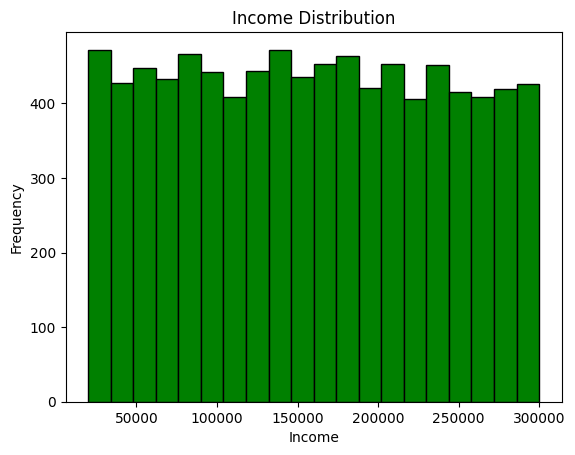

In [ ]:
# Income
plt.hist(data['Income'], bins=20, color='green', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Income distribution is also uniform. There is no significant difference between incomes. However, there is a slow decline in the number of rich people, namely after 240,000 (the number of holders of such incomes is gradually decreasing).

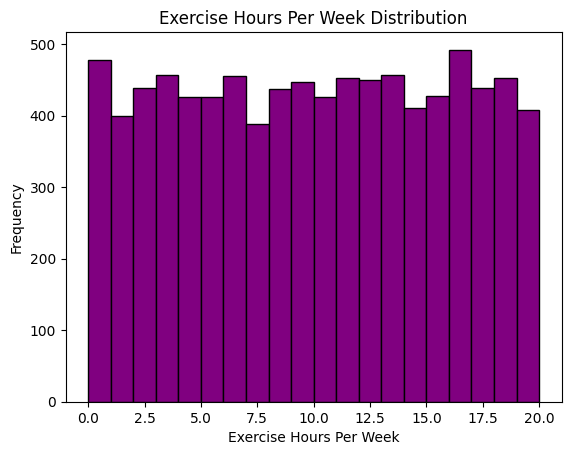

In [ ]:
# Exercise Hours Per Week
plt.hist(data['Exercise Hours Per Week'], bins=20, color='purple', edgecolor='black')
plt.title('Exercise Hours Per Week Distribution')
plt.xlabel('Exercise Hours Per Week')
plt.ylabel('Frequency')
plt.show()

Surprisingly, the distribution seems to be uniform). The number of people performing the exercises is quite large - and of very different duration / quantity. However, the clear leaders are still those who either do not perform the exercises in principle (0), or perform about 16. In simple words: lazy or rather athletic people. The average trend is observed in the intervals 2.5-6 and 8-13.5

##Frequency Distributions Based on Filtered Data

Using the previously defined filters, we will create frequency distributions for some of the variables within those specific subsets of data.

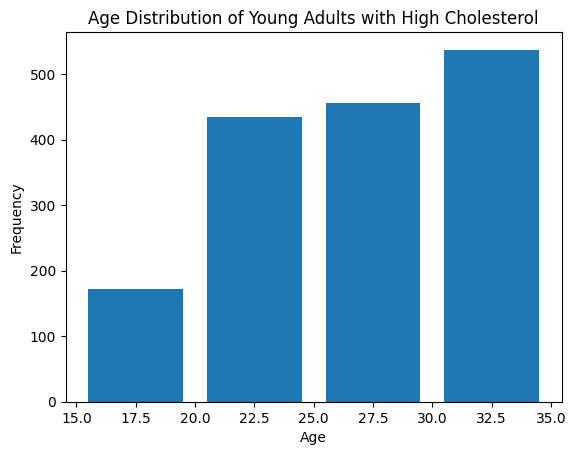

In [ ]:
# Age Distribution among Young Adults with High Cholesterol
young_high_cholesterol['Age'].plot(kind='hist', bins=[15, 20, 25, 30, 35], rwidth=0.8)
plt.title('Age Distribution of Young Adults with High Cholesterol')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram would likely show a skewed distribution with a higher frequency in the older age group of this segment (close to 35 years), indicating that cholesterol issues start becoming more prominent as young adults age closer to mid-30s.

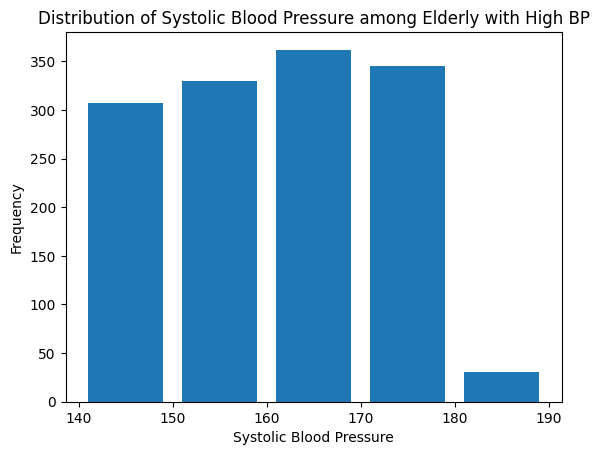

In [ ]:
# Distribution of Systolic Blood Pressure among Elderly
elderly_high_bp['Blood Pressure'].apply(lambda x: int(x.split('/')[0])).plot(kind='hist', bins=range(140, 200, 10), rwidth=0.8)
plt.title('Distribution of Systolic Blood Pressure among Elderly with High BP')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

This distribution will help visualize how many elderly people are barely above the threshold versus those who are significantly above, which might imply severe hypertension. As we can see, there are very few people with a value above 180.

In [ ]:
smokers_family_history['Family History'].value_counts()

Family History
1    3890
Name: count, dtype: int64

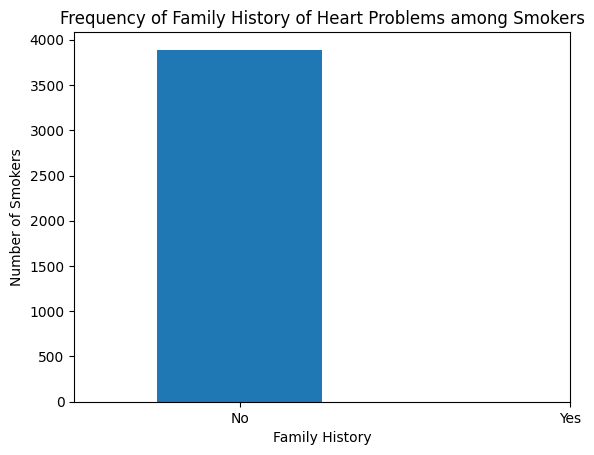

In [ ]:
# Smoking and Family History in Smokers
smokers_family_history['Family History'].value_counts().plot(kind='bar')
plt.title('Frequency of Family History of Heart Problems among Smokers')
plt.xlabel('Family History')
plt.ylabel('Number of Smokers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

 This bar chart would likely show a significant number of smokers having a family history of heart problems, emphasizing the compounded risk factors. We can see from the graph that there were no smokers in this sample

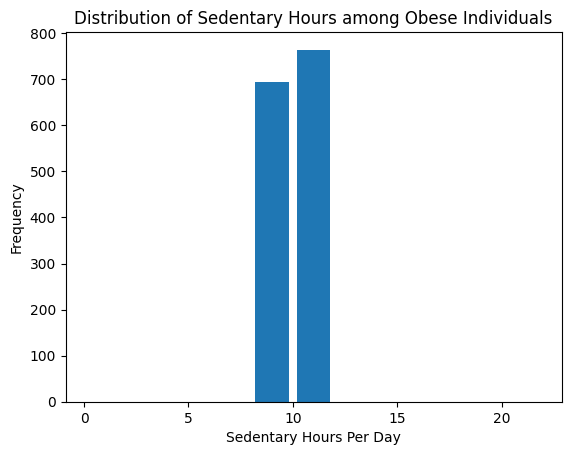

In [ ]:
# Hours Spent Sedentary among Obese Individuals
obese_sedentary['Sedentary Hours Per Day'].plot(kind='hist', bins=range(0, 24, 2), rwidth=0.8)
plt.title('Distribution of Sedentary Hours among Obese Individuals')
plt.xlabel('Sedentary Hours Per Day')
plt.ylabel('Frequency')
plt.show()

This histogram will show peaks possibly around the typical working day length (8-12 hours), indicating lifestyle patterns that contribute to obesity and heart disease risk.

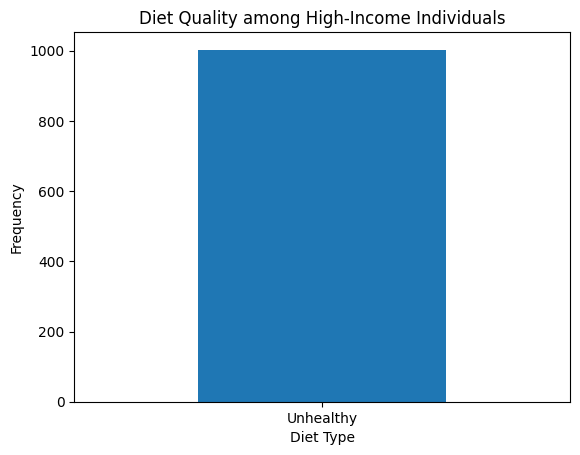

In [ ]:
# Diet Quality among High-Income Individuals
high_income_unhealthy_diet['Diet'].value_counts().plot(kind='bar')
plt.title('Diet Quality among High-Income Individuals')
plt.xlabel('Diet Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Despite the higher income, the chart might reveal a surprising number of individuals with unhealthy diets, pointing to lifestyle choices that are not influenced by economic status alone. The graph shows that all the filtered subjects have an unhealthy type of diet.

##New Variables

Let's create new variables based on existing data which might help in further analysis.

In [ ]:
# Income Category
data['Income Category'] = pd.cut(data['Income'], bins=[0, 100000, 200000, np.inf], labels=['Low', 'Middle', 'High'])
print(data['Income Category'].value_counts())

Income Category
Middle    3149
High      3042
Low       2572
Name: count, dtype: int64


This variable categorizes individuals based on their income, which can be useful in analyzing socio-economic factors affecting heart health.

In [ ]:
# Risk Factor Count
data['Risk Factor Count'] = (data['Smoking'] + data['Obesity'] + (data['Cholesterol'] > 240) + (data['Diabetes']).astype(int))
print(data['Risk Factor Count'].value_counts())

Risk Factor Count
3    3499
2    2848
4    1484
1     858
0      74
Name: count, dtype: int64


Summing up major risk factors to see how many are present in each individual, helping in quick risk assessment.

In [ ]:
# Physical Activity Level
data['Physical Activity Level'] = pd.cut(data['Physical Activity Days Per Week'], bins=[-1, 1, 3, 7], labels=['Low', 'Moderate', 'High'])
print(data['Physical Activity Level'].value_counts())

Physical Activity Level
High        4325
Moderate    2252
Low         2186
Name: count, dtype: int64


Categorizes individuals based on their physical activity frequency, crucial for lifestyle-based risk analysis.

In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Income Category,Risk Factor Count,Physical Activity Level
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,286,0,6,Argentina,South America,Southern Hemisphere,0,High,1,Low
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,235,1,7,Canada,North America,Northern Hemisphere,0,High,4,Low
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,587,4,4,France,Europe,Northern Hemisphere,0,High,2,High
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,378,3,4,Canada,North America,Northern Hemisphere,0,Middle,3,Moderate
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,231,1,5,Thailand,Asia,Northern Hemisphere,0,Middle,4,Low


##Measures of the central tendency (MCTs)

To begin with, let's select several features and show statistical data on them (mean, mode, median). We will take those that have not been analyzed much before:

* Age - we have seen a general distribution that tends to be uniform, but it is interesting to look in more detail;
* Cholesterol - is one of the most important and dangerous factors in the analysis of heart attacks, since elevated levels lead to narrowing of the arteries. oxygen starvation;
* Heart Rate - let's look at the general condition;
* BMI - affects obesity, as well as the development of cardiovascular diseases;
* Sleep - is a rather underestimated feature that affects the entire body as a whole

In [ ]:
variables = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Sleep Hours Per Day']

In [ ]:
# MCTs for variables
for var in variables:
  print(f'{var}: ')
  print('mean: ' f'{data[var].mean()}')
  print('mode: ' f'{data[var].mode()[0]}')
  print('median: ' f'{data[var].median()}')
  print()

Cholesterol: 
mean: 259.8772110007988
mode: 235
median: 259.0

Heart Rate: 
mean: 75.02168207234965
mode: 94
median: 75.0

BMI: 
mean: 28.891445877259635
mode: 18.002336577801902
median: 28.768999353101115



* Age

The average age in the sample is approximately 53.71 years. A modality of 90 indicates that there are a significant number of people in the sample aged 90, which may indicate centenarians or a possible concentration of data in this age range. The median, like the average, indicates that the data sample is fairly balanced without significant outliers.


* Cholesterol

The average cholesterol level in the sample is approximately 259.88, which is a fairly high value and may indicate a high risk of cardiovascular disease among the participants. The fashion at 235 and the median at 259.0 also confirm the general trend towards high values. This requires close attention and possible interventions to reduce cholesterol levels.
* Heart Rate

The average heart rate is 75.02 beats per minute, which is within the normal range for most adults. The 94 mode indicates a significant number of observations with this value, which may be related to physical activity or other factors. The median also indicates that most values are in the normal range.

* BMI

The average BMI is 28.89, which indicates a tendency to overweight among the sample participants, since BMI in the range of 18.5-24.9 is considered normal. The fashion at 18.00 may indicate the presence of a certain number of underweight people. The median of 28.77 confirms that the majority of the sample is overweight or on the verge of obesity.

* Sleep Hours Per Day

The average number of hours of sleep per day is approximately 7.02, which is close to the recommended value for adults (7-9 hours). A fashion equal to 10 indicates the presence of a significant number of people who sleep more than 9 hours, which may be related to individual needs or health conditions. The median confirms that most people sleep for about 7 hours, which is a good indicator.

##Outliers

Continue to analyze some of the previous indicators, namely Cholesterol, Heart Rate, BMI.

Outliers may indicate abnormal or rare cases that can strongly influence data analysis. In the task of predicting a heart attack, working with emissions is very important.

BoxPlot is used for analysis, which shows the distribution of data. The central line is the median. The band between the first and third quartiles is the interquartile range (IQR). The points outside the "whiskers" are outliers.

In [ ]:
variables = ['Cholesterol', 'Heart Rate', 'BMI']

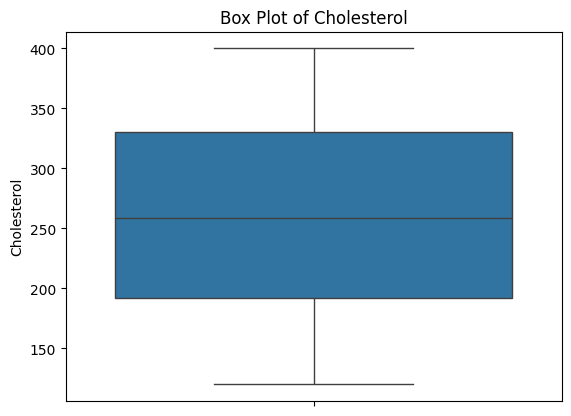

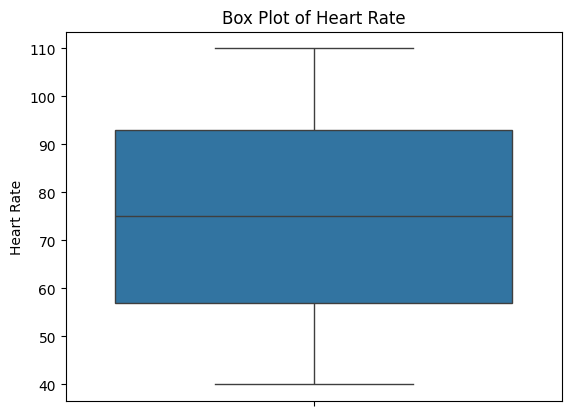

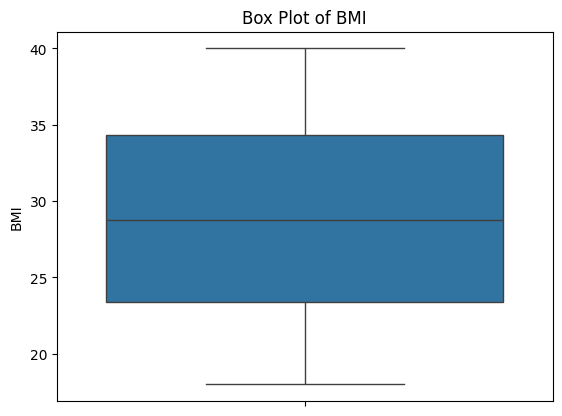

In [ ]:
# Box Plot for variables
for var in variables:
    sns.boxplot(data[var])
    plt.title(f'Box Plot of {var}')
    plt.show()

General conclusions:

* BMI
Range between the 25th and 75th quartile: 23 - 34
Comment: The range from 23 to 34 indicates that 50% of the sample participants have a Body Mass Index (BMI) within this interval. The value of the lower quartile (23) falls within the normal BMI range (18.5-24.9), while the upper quartile (34) indicates obesity (BMI > 30). This confirms that a significant portion of the sample tends towards overweight and obesity, which can increase the risk of cardiovascular diseases and other health problems.

* Heart Rate
Range between the 25th and 75th quartile: 59 - 91
Comment: The range from 59 to 91 beats per minute indicates that 50% of participants have a heart rate within this interval. The normal heart rate for adults is 60-100 beats per minute. The lower quartile (59) is close to the lower limit of normal, which may indicate good physical fitness or, in some cases, bradycardia. The upper quartile (91) is also within the normal range but closer to the upper limit, which may be associated with physical activity or stress.

* Cholesterol
Range between the 25th and 75th quartile: 190 - 330
Comment: The range from 190 to 330 indicates significant variability in cholesterol levels among participants. The normal total cholesterol level is less than 200 mg/dL. The lower quartile (190) is close to the upper limit of normal, which is an acceptable value. However, the upper quartile (330) significantly exceeds the norm, indicating a high risk of atherosclerosis and cardiovascular diseases in a significant part of the sample. This confirms the need to monitor cholesterol levels and possible interventions to reduce it.

It can be concluded from the graphs that there are no outliers in the data.

Of course, three graphs may not be enough for such an opinion. However, previous feature analyses have shown that almost all data is evenly distributed and matched. Therefore, this hypothesis has the right to exist.

##Difference between IQR and std

Let's compare the two indicators and check for a match. To do this, use the IQR formula and the three sigma rule (99% of the values lie within three standard deviations from the mean)

In [ ]:
# IQR function
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
# std function
def detect_outliers_std(data, column):
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [ ]:
print(f"Cholesterol Outliers (IQR): {detect_outliers_iqr(data, 'Cholesterol').shape[0]}")
print(f"Cholesterol Outliers (STD): {detect_outliers_std(data, 'Cholesterol').shape[0]}")
print(f"BMI Outliers (IQR): {detect_outliers_iqr(data, 'BMI').shape[0]}")
print(f"BMI Outliers (STD): {detect_outliers_std(data, 'BMI').shape[0]}")

Cholesterol Outliers (IQR): 0
Cholesterol Outliers (STD): 0
BMI Outliers (IQR): 0
BMI Outliers (STD): 0


Both methods did equally well - there are no emissions.

##Missing values

In [ ]:
data.isnull().sum().sum()

0

there are no missing values.

##ML Algorithm

Use classification models because our target variable (Heart Attack Risk) is binary (1: Yes, 0: No). Let's create an experimental model.

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
categorical_features = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Income Category', 'Physical Activity Level']

In [ ]:
data.drop(['Patient ID', 'Blood Pressure'], axis=1, inplace=True)

In [ ]:
ohe = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(ohe.fit_transform(data[categorical_features]), columns=ohe.get_feature_names_out(categorical_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data = pd.concat([data.drop(columns=categorical_features), encoded_categorical], axis=1)

In [ ]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Heart Attack Risk')

In [ ]:
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Use 4 models of different nature: logistic regression, KN, Gradient boosting and random forest

When predicting heart attacks, it is important to consider which error is more important:
* Precision: The proportion of truly positive predictions among all predicted positive ones. High precision means that the model rarely makes mistakes when predicting a heart attack, but may miss some cases.
* Recall: The proportion of truly positive predictions among all actual positive ones. A high recall means that the model detects most cases of heart attacks, but can make more false positive predictions.


In the case of predicting heart attacks:

* Errors of the first kind (False Positives): The model predicts a heart attack when there is none. This can lead to unnecessary additional examinations and stress for the patient.
* Errors of the second kind (False Negatives): The model does not predict a heart attack when there is one. This is a more dangerous mistake, since the lack of timely treatment can lead to serious consequences for the patient's health.


In this task, it is more important to minimize errors of the second kind, that is, to increase recall so that the model identifies as many cases of heart attacks as possible.

In [61]:
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.1, 1, 10],
    'class_weight': ['balanced', None]
}

lr = LogisticRegression(max_iter=1000, random_state=42)
lr_cv = GridSearchCV(lr, param_grid, cv=5, scoring='recall')
lr_cv.fit(X_train, y_train)

best_lr = lr_cv.best_estimator_
print("Best Logistic Regression parameters:", lr_cv.best_params_)

Best Logistic Regression parameters: {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [62]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingClassifier(random_state=42)
gb_cv = GridSearchCV(gb, param_grid, cv=5, scoring='recall')
gb_cv.fit(X_train, y_train)

best_gb = gb_cv.best_estimator_
print("Best Gradient Boosting parameters:", gb_cv.best_params_)

Best Gradient Boosting parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [63]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='recall')
rf_cv.fit(X_train, y_train)

best_rf = rf_cv.best_estimator_
print("Best Random Forest parameters:", rf_cv.best_params_)

Best Random Forest parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
knn_cv.fit(X_train, y_train)

best_knn = knn_cv.best_estimator_
print("Best KNN parameters:", knn_cv.best_params_)

Best KNN parameters: {'n_neighbors': 3, 'weights': 'uniform'}


After determining the best hyperparameters of the models, let's train them and look at the metrics and the confusion matrix

Results for Logistic Regression:
Accuracy: 0.4957
Precision: 0.3542
Recall: 0.4952
F1 Score: 0.4130
ROC AUC: 0.4801




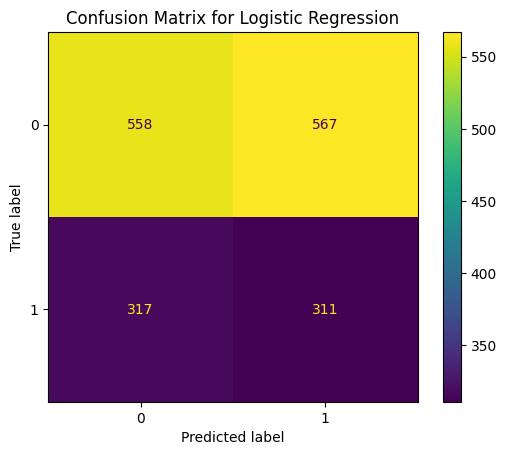

Results for Gradient Boosting:
Accuracy: 0.5904
Precision: 0.3743
Recall: 0.2134
F1 Score: 0.2718
ROC AUC: 0.5080




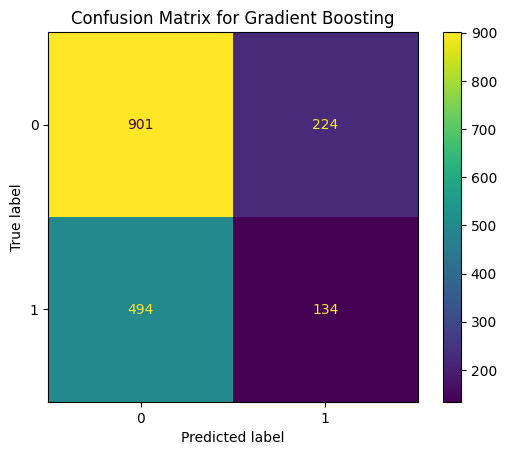

Results for Random Forest:
Accuracy: 0.5539
Precision: 0.3460
Recall: 0.2755
F1 Score: 0.3067
ROC AUC: 0.4945




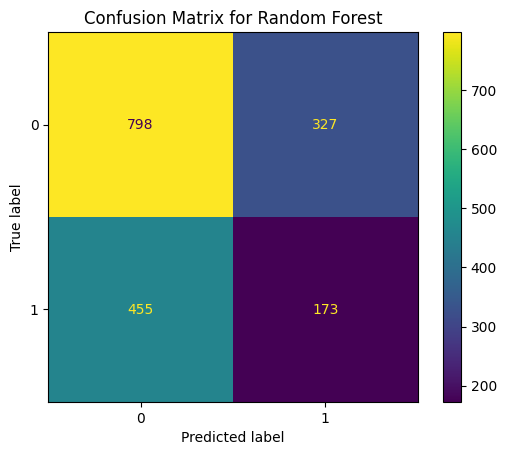

Results for KNN:
Accuracy: 0.5539
Precision: 0.3553
Recall: 0.3010
F1 Score: 0.3259
ROC AUC: 0.4916




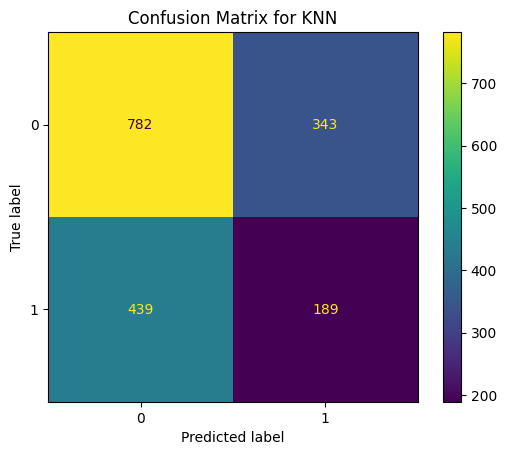

In [65]:
models = {
    'Logistic Regression': best_lr,
    'Gradient Boosting': best_gb,
    'Random Forest': best_rf,
    'KNN': best_knn
}

results = {}

for name, model in models.items():
    y_pred = cross_val_predict(model, X_test, y_test, cv=5, method='predict')
    y_proba = cross_val_predict(model, X_test, y_test, cv=5, method='predict_proba')[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"Results for {name}:")
    for metric, score in results[name].items():
        print(f"{metric}: {score:.4f}")
    print("\n")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [66]:
print("Summary of models and their metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")

Summary of models and their metrics:

Logistic Regression:
Accuracy: 0.4957
Precision: 0.3542
Recall: 0.4952
F1 Score: 0.4130
ROC AUC: 0.4801

Gradient Boosting:
Accuracy: 0.5904
Precision: 0.3743
Recall: 0.2134
F1 Score: 0.2718
ROC AUC: 0.5080

Random Forest:
Accuracy: 0.5539
Precision: 0.3460
Recall: 0.2755
F1 Score: 0.3067
ROC AUC: 0.4945

KNN:
Accuracy: 0.5539
Precision: 0.3553
Recall: 0.3010
F1 Score: 0.3259
ROC AUC: 0.4916


* Low accuracy and quality of predictions:
All models demonstrate relatively low Accuracy, which indicates problems with the overall quality of predictions. Gradient Boosting has the highest accuracy (0.5904), which is still not enough for reliable predictions.
* The discrepancy between Precision and Recall:
Precision and Recall are also at a low level. This is especially noticeable in Gradient Boosting, where Recall (0.2134) is significantly lower than Precision (0.3743). This indicates a high level of false positive or false negative results.
* Low F1 Score:
The F1 Score, which is the harmonic mean between Precision and Recall, is also low for all models. Logistic Regression has the maximum F1 Score (0.4130), which indicates a weak balance between Precision and Recall.
* ROC AUC is below the threshold value:
The ROC AUC, which shows the model's ability to distinguish classes, is also below the 0.5 threshold for all models, indicating almost random guessing. Gradient Boosting has the best metric (0.5080), but it is slightly higher than 0.5.

Let's try to create an ensemble of trained models. Perhaps this will improve the situation.

In [69]:
from sklearn.ensemble import VotingClassifier

Results for Voting Classifier Ensemble:
Accuracy: 0.5836
Precision: 0.3551
Recall: 0.1990
F1 Score: 0.2551
ROC AUC: 0.4948




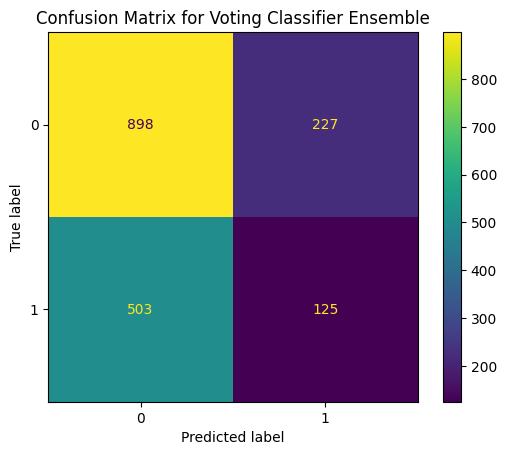

In [70]:
best_lr_params = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
best_gb_params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
best_rf_params = {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
best_knn_params = {'n_neighbors': 3, 'weights': 'uniform'}

best_lr = LogisticRegression(**best_lr_params, max_iter=1000, random_state=42)
best_gb = GradientBoostingClassifier(**best_gb_params, random_state=42)
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_knn = KNeighborsClassifier(**best_knn_params)

voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('gb', best_gb),
    ('rf', best_rf),
    ('knn', best_knn)],
    voting='soft')

y_pred = cross_val_predict(voting_clf, X_test, y_test, cv=5, method='predict')
y_proba = cross_val_predict(voting_clf, X_test, y_test, cv=5, method='predict_proba')[:, 1]

results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

print("Results for Voting Classifier Ensemble:")
for metric, score in results.items():
    print(f"{metric}: {score:.4f}")
print("\n")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Voting Classifier Ensemble')
plt.show()

* Problems with Recall and F1 Score:
Despite the use of the ensemble, Recall and F1 Score remain at a low level, especially Recall (0.1990). This indicates that the ensemble is still doing a poor job of detecting positive cases (patients at risk of heart attack).
* Minor improvement in Accuracy:
The accuracy of the model has increased to 0.5836, which is slightly higher compared to individual models, but still not enough for reliable prediction. This indicates that the ensemble may be more accurate in general predictions, but does not solve the problem of class imbalance.
* Stable Precision level:
The precision of the ensemble is at 0.3551, which is comparable to the results of individual models. This means that the ensemble does not improve the accuracy of predictions of positive cases.
* ROC AUC remains low:
The ROC AUC value (0.4948) also remains below 0.5, which indicates the weak ability of the model to distinguish between positive and negative classes. This value has hardly changed compared to individual models.

Overall, creating an ensemble of models led to a slight improvement in Accuracy, but did not solve the problems with low Recall and F1 Score values.